In [1]:
from ultralytics.models.sam import SAM
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import cv2
from optimum.intel import OVStableDiffusionInpaintPipeline

Multiple distributions found for package optimum. Picked distribution: optimum
c:\Users\zeyad\miniconda3\envs\multimodal\Lib\site-packages\torch\amp\autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


In [2]:
img_path = "../data/dummy_selfie.png"
bbox = [501.4826,  188.8253,  706.8513,  493.8286]

orig_img = Image.open(img_path)

seg_model = SAM("mobile_sam.pt")


0: 1024x1024 1 0, 1684.4ms
Speed: 67.8ms preprocess, 1684.4ms inference, 25.6ms postprocess per image at shape (1, 3, 1024, 1024)


(-0.5, 1183.5, 789.5, -0.5)

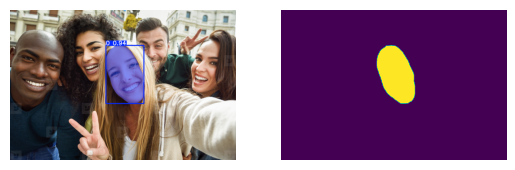

In [3]:
segmentation_results = seg_model(orig_img, bboxes=[bbox])[0]


masks = segmentation_results.masks.data

plt.subplot(121)
plt.imshow(segmentation_results.plot()[:, :, ::-1])
plt.axis("off")

plt.subplot(122)
plt.imshow(masks[0].numpy())
plt.axis("off")

In [4]:
# diffuser_model = OVStableDiffusionInpaintPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-inpainting")
# diffuser_model.save_pretrained("../checkpoints/sd15_inpaint_openvino")

diffuser_model = OVStableDiffusionInpaintPipeline.from_pretrained("../checkpoints/sd15_inpaint_openvino")
diffuser_model.safety_checker = None

In [ ]:
mask_img = Image.fromarray((masks[0].numpy() * 255).astype(np.uint8))
prompt = "blur"

In [6]:
result = diffuser_model(
    prompt=prompt,
    image=orig_img,
    mask_image=mask_img,
    strength=0.75,         # 1.0 = full replacement, 0.0 = no change
    guidance_scale=7.5,    # How strictly to follow the text prompt
    num_inference_steps=20 # Lower for speed, higher for quality
)

  0%|          | 0/15 [00:00<?, ?it/s]

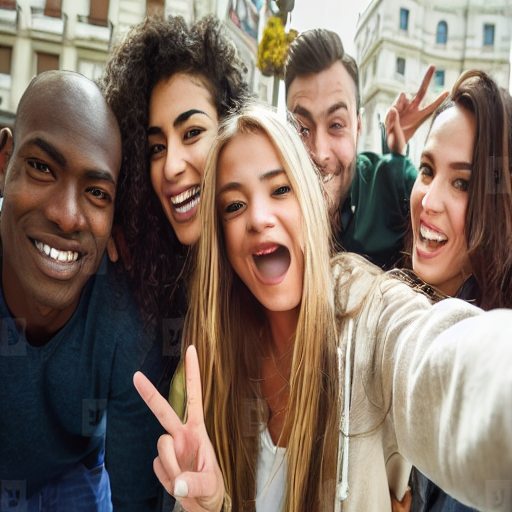

In [7]:
result.images[0]